# **Naive Bayes Classifier**

```Iris``` dataset description [here](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html#sklearn.datasets.load_iris) \
```GaussianNB``` documentation [here](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html#sklearn.naive_bayes.GaussianNB)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import load_iris # Iris dataset

In [2]:
iris = load_iris() # Load the iris dataset
iris_x = iris.data[:, 0:2] # Features. We'll pick 2
iris_y = iris.target # Labels

# Print shapes
print (iris_x.shape, iris_y.shape)

(150, 2) (150,)


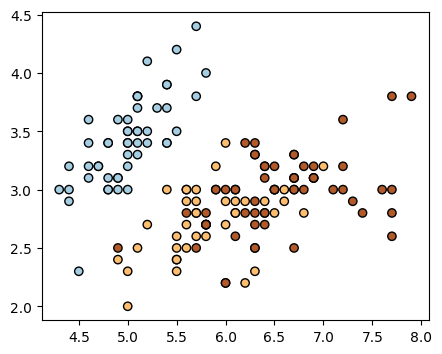

In [3]:
_, ax = plt.subplots(figsize=(5,4))
ax.scatter(iris_x[:, 0], iris_x[:, 1], c= iris_y, edgecolors= 'k', cmap= 'Paired')

In [4]:
# Instance kNN object
naive_bayes = GaussianNB()

# Training
naive_bayes.fit( iris_x , iris_y )

GaussianNB()

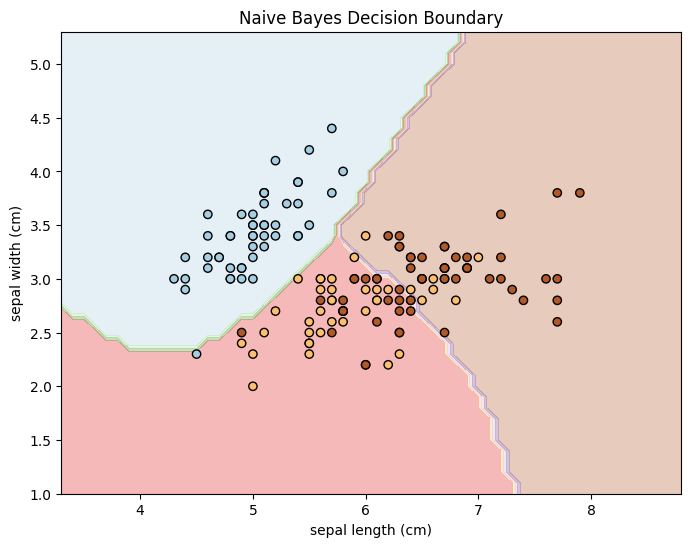

In [9]:
# Crear una malla para graficar la frontera de decisión
x_min, x_max = iris_x[:, 0].min() - 1, iris_x[:, 0].max() + 1
y_min, y_max = iris_x[:, 1].min() - 1, iris_x[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Predecir las etiquetas para cada punto en la malla
Z = naive_bayes.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Graficar la frontera de decisión y los puntos de datos
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='Paired')
plt.scatter(iris_x[:, 0], iris_x[:, 1], c=iris_y, edgecolors='k', cmap='Paired')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title('Naive Bayes Decision Boundary')
plt.show()


In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB

In [53]:
fruit_data = pd.read_csv('/content/drive/MyDrive/Machine/Trabajos _de _clase/KNN/fruits_data_ext.csv') # Load the fruits dataset
fruits_x = fruit_data[['mass','color_score']]  # Features. We'll pick 2
fruits_y = fruit_data['fruit_label'] # Labels

# Convert everything to a np array
fruits_x, fruits_y = np.asarray(fruits_x), np.asarray(fruits_y)

# Print shapes
print ( fruits_x.shape, fruits_y.shape )

(177, 2) (177,)


In [54]:
# Instance GaussianNB object
naive_bayes = GaussianNB()

# Training
naive_bayes.fit(fruits_x, fruits_y) #(num_samples, Features)

GaussianNB()

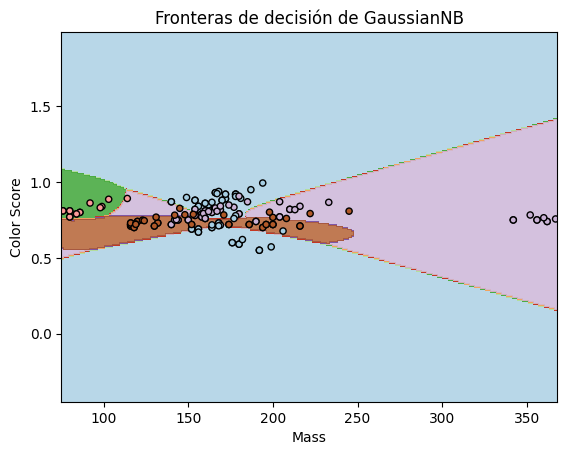

In [55]:
# Crear una malla para trazar las fronteras de decisión
x_min, x_max = fruits_x[:, 0].min() - 1, fruits_x[:, 0].max() + 1
y_min, y_max = fruits_x[:, 1].min() - 1, fruits_x[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Predecir las clases para cada punto en la malla
Z = naive_bayes.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Trazar las fronteras de decisión
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.Paired)
plt.scatter(fruits_x[:, 0], fruits_x[:, 1], c=fruits_y, edgecolors='k', marker='o', s=20, cmap=plt.cm.Paired)
plt.xlabel('Mass')
plt.ylabel('Color Score')
plt.title('Fronteras de decisión de GaussianNB')
plt.show()